## Preparation

In [1]:
import matplotlib.pyplot as plt
import sys
import wfdb

sys.path.append("..")

from raccoon.detectors import GarciaBerdonesDetector
from raccoon.utils.annotationutils import trigger_points

Using TensorFlow backend.


In [2]:
def read_record(path, sampto):
    record = wfdb.rdrecord(path, sampto=sampto)
    annotation = wfdb.rdann(path, 'atr', sampto=sampto)
    trigger = trigger_points(annotation)
    return record, trigger

def read_records(directory, names, sampto):
    records, triggers = [], []
    for name in names:
        path = "/".join([directory, name])
        record, trigger = read_record(path, sampto)
        records.append(record)
        triggers.append(trigger)
    return records, triggers

In [3]:
record_dir = "../data/mitdb"
test_names = ["100", "109"]
train_names = ["100", "101", "102", "103", "104"]
sampto = 10000

train_records, train_triggers = read_records(record_dir, train_names, sampto)
test_records, test_triggers = read_records(record_dir, test_names, sampto)

In [4]:
detector = GarciaBerdonesDetector(
    name = "GarciaBerdones01",
    batch_size = 32,
    window_size = 20,
    epochs = 5)

detector.train(train_records, train_triggers)

Epoch 1/5
1559/1559 [==============================] - 2s 1ms/step - loss: 0.0917
Epoch 2/5
1559/1559 [==============================] - 2s 1ms/step - loss: 0.0384
Epoch 3/5
1559/1559 [==============================] - 2s 1ms/step - loss: 0.0356
Epoch 4/5
1559/1559 [==============================] - 1s 887us/step - loss: 0.0324
Epoch 5/5
1559/1559 [==============================] - 1s 892us/step - loss: 0.0333TA


In [5]:
trigger_signals = detector.trigger_signals(test_records)

## (Nearly) Ideal Trigger Signal 

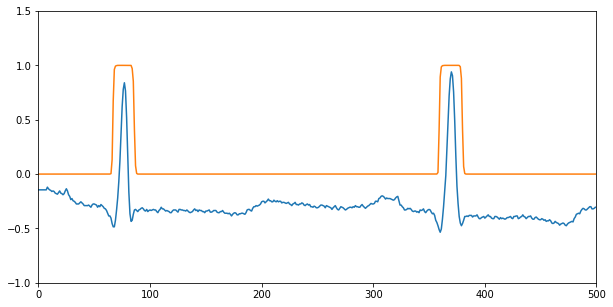

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

ax.plot(test_records[0].p_signal.T[0])
ax.plot(trigger_signals[0])
ax.set_xlim(0,500)
ax.set_ylim(-1, 1.5)

fig.savefig(
    '../../msc-thesis/thesis/images/ideal_trigger_signal.png',
    bbox_inches = 'tight',
    pad_inches = 0)

plt.show()

## Flawed Trigger Signal

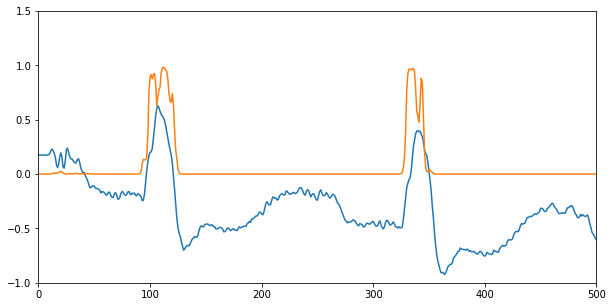

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

ax.plot(test_records[1].p_signal.T[0])
ax.plot(trigger_signals[1])
ax.set_xlim(0,500)
ax.set_ylim(-1, 1.5)

fig.savefig(
    '../../msc-thesis/thesis/images/flawed_trigger_signal.png',
    bbox_inches = 'tight',
    pad_inches = 0)

plt.show()